### Load and Understand the Dataset

In [2]:
# Importing libraries and load the data
import pandas as pd

# URL of the dataset on GitHub
url = 'https://github.com/rohithrajthalla/predicitve-maintenance/raw/refs/heads/main/ai4i2020.csv'

# Load the dataset
df = pd.read_csv(url)

In [3]:
# Display the first few rows to inspect the data
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [5]:
# Check for missing values
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

- The dataset has 14 columns and 10,000 entries with no missing values.
- The target variable appears to be Machine failure, and there are several categorical variables (Product ID, Type).
- The numerical features include temperature, rotational speed, torque, and tool wear, which are important for predictive maintenance.
- The data looks clean in terms of missing values, and the columns are properly loaded. The two object type columns (Product ID and Type) will need encoding before we can use them in our machine learning models.

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics of numerical features
print(df.describe())

               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000   

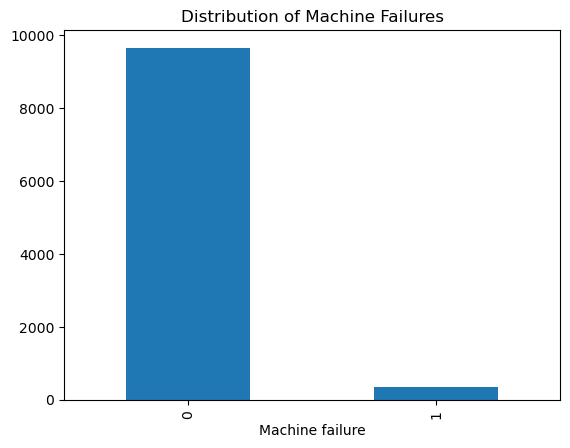

In [8]:
# Distribution of the target variable (Machine failure)
df['Machine failure'].value_counts().plot(kind='bar', title='Distribution of Machine Failures')
plt.show()

Class Imbalance:
- Machine Failure: The dataset is highly imbalanced, with only 3.39% of the machines experiencing failure
- This imbalance must be addressed when building the model, as a model might simply predict the majority class (non-failure) and still achieve high accuracy due to the dominance of non-failure examples.

### Encode Categorical Variables
- error ValueError: could not convert string to float: 'M14860' occurs because there are non-numeric values in the Product ID column, such as 'M14860'. This column likely contains categorical data that cannot be directly processed by mathematical operations or correlations as numerical data.
- Since the Product ID is more like an identifier, we can use Label Encoding, while Type may be better suited to One-Hot Encoding.

In [11]:
from sklearn.preprocessing import LabelEncoder

# Label encode 'Product ID'
le = LabelEncoder()
df['Product ID'] = le.fit_transform(df['Product ID'])

# One-hot encode 'Type' column
df = pd.get_dummies(df, columns=['Type'], drop_first=True)

# Check the first few rows after encoding
df.head()


,UDI,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_L,Type_M
0,1,7003,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,False,True
1,2,1003,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,True,False
2,3,1004,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,True,False
3,4,1005,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,True,False
4,5,1006,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,True,False


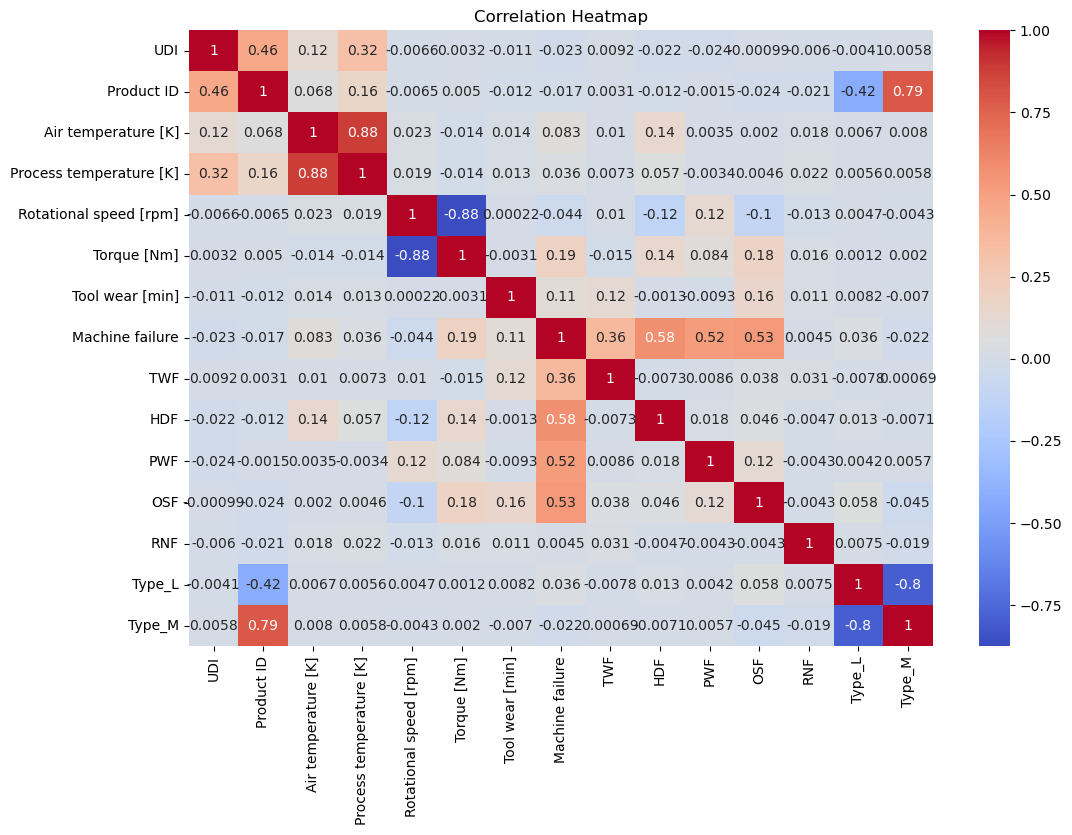

In [12]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Feature Correlations:
- Air Temperature [K] and Process Temperature [K] have a strong positive correlation (0.88), which is expected as the process temperature often depends on the air temperature in industrial settings.
- Rotational Speed [rpm] and Torque [Nm] show a strong negative correlation (-0.88), indicating that these two variables are inversely related, a common phenomenon in machinery where higher speed can reduce the torque needed.
- Machine Failure correlates the most with the following failure types:
- HDF (Heat Dissipation Failure): 0.58 correlation with Machine failure.
- PWF (Power Failure): 0.52 correlation.
- OSF (Overstrain Failure): 0.53 correlation

- Although Tool wear [min] doesn't show a strong correlation with Machine failure (0.11), it is still a relevant factor as it can influence other mechanical components over time.

### Class Imbalance with SMOTE
- SMOTE (Synthetic Minority Over-sampling Technique) to create a balanced training dataset by generating synthetic samples for the minority class (machine failures).

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(['UDI', 'Machine failure'], axis=1)  # Drop UDI since it's just an identifier
y = df['Machine failure']  # Target variable

# Split the data into training and test sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to the training data to balance the classes
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Check the shape of the resampled data
print("Resampled X shape:", X_res.shape)
print("Resampled y shape:", y_res.shape)

Resampled X shape: (13526, 13)
Resampled y shape: (13526,)


- Now the dataset has been resampled and is balanced (with 13,526 samples)

### Building the Base Model
- **Logistic Regression model**
- **Random Forest Classifier**
- **Hyperparameter Tuning for Random Forest**
- **XGBoost model**
- **Hyperparameter tuning for the XGBoost model**

Logistic Regression Performance:

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      2898
           1       0.35      0.99      0.52       102

    accuracy                           0.94      3000
   macro avg       0.67      0.96      0.74      3000
weighted avg       0.98      0.94      0.95      3000



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


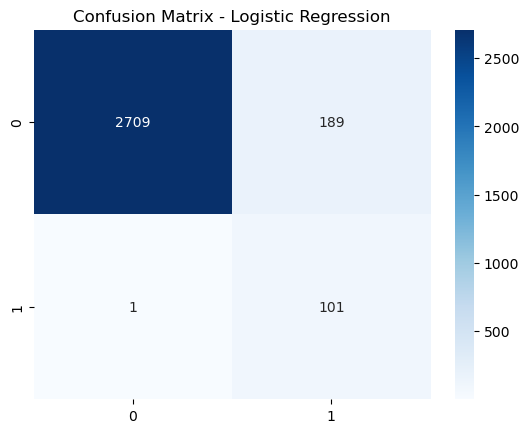

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_res, y_res)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model performance
print("Logistic Regression Performance:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


Imbalanced Performance:
- Precision (0): The model has almost perfect precision for the majority class (non-failure), meaning it correctly identifies almost all of the non-failure cases.
- Precision (1): For the minority class (failures), precision is quite low at 0.35, meaning a lot of the predicted failures were actually non-failures (false positives).
- Recall (1): The recall for the failure class is 0.99, which indicates that the model is very sensitive in identifying failures. 
- F1-Score (1): The F1-score for the minority class is 0.52, reflecting the balance between precision and recall. 
- Accuracy: The overall accuracy of 94% is high, but it’s heavily influenced by the model’s performance on the majority class (non-failures).

**Random Forest Classifier**
- Typically perform better with imbalanced datasets

Random Forest Performance:

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2898
           1       0.57      0.96      0.72       102

    accuracy                           0.97      3000
   macro avg       0.79      0.97      0.85      3000
weighted avg       0.98      0.97      0.98      3000



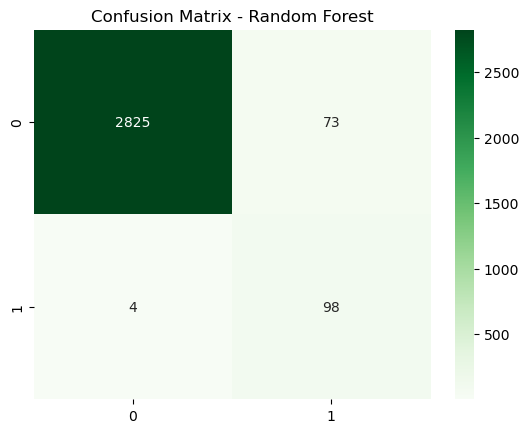

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_clf.fit(X_res, y_res)

# Make predictions on the test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model performance
print("Random Forest Performance:\n")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.show()

- Improved Precision (1): Precision for the minority class (1) has significantly improved compared to the Logistic Regression model. The Random Forest model has a precision of 0.57 for predicting failures, which means that more of the predicted failures are actual failures.
- High Recall (1):The recall for the failure class remains high at 0.96, meaning that the model is still identifying almost all of the failure cases.
- Balanced F1-Score (1):The F1-score for the failure class is now 0.72, showing a better balance between precision and recall compared to Logistic Regression (which had an F1-score of 0.52 for the failure class).
- Overall Accuracy:The overall accuracy has slightly improved to 97%, but accuracy is not the best metric in the case of imbalanced datasets. The model's performance on the minority class is more important.
- Confusion Matrix:The Random Forest model significantly reduces the number of false positives compared to Logistic Regression, as seen in the confusion matrix.

**Hyperparameter Tuning for Random Forest**
- We'll use GridSearchCV to systematically test different hyperparameter combinations, such as:

- Number of trees (n_estimators)
- Maximum depth of the trees (max_depth)
- Minimum samples required to split a node (min_samples_split)
- Minimum samples required at a leaf node (min_samples_leaf)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters found by GridSearchCV: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest Performance (After Hyperparameter Tuning):

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2898
           1       0.63      0.96      0.76       102

    accuracy                           0.98      3000
   macro avg       0.81      0.97      0.87      3000
weighted avg       0.99      0.98      0.98      3000



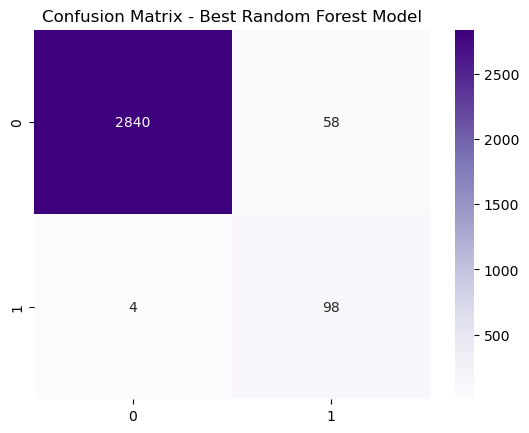

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required at a leaf node
    'bootstrap': [True, False]        # Whether bootstrap samples are used when building trees
}

# Initialize the Random Forest model
rf_clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='f1')

# Fit the model on resampled training data
grid_search.fit(X_res, y_res)

# Best parameters from GridSearchCV
print("Best parameters found by GridSearchCV:", grid_search.best_params_)

# Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Performance metrics
print("Random Forest Performance (After Hyperparameter Tuning):\n")
print(classification_report(y_test, y_pred_best_rf))

# Confusion Matrix for the best Random Forest model
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(conf_matrix_best_rf, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - Best Random Forest Model')
plt.show()

- Improved Precision and Recall: Precision (1): The precision for the failure class (1) improved from 0.57 to 0.63, indicating fewer false positives compared to the untuned model.
- Recall (1): The recall for the failure class remains very high at 0.96, meaning that the model is still identifying nearly all actual failure cases.
- Balanced F1-Score (1): The F1-score for the failure class increased from 0.72 to 0.76, reflecting better balance between precision and recall after hyperparameter tuning.
- Overall Accuracy: The overall accuracy is now 98%, which is slightly improved from the previous model. However, the most important takeaway is the improvement in performance for the minority class (failures).

- Best Hyperparameters:
- The best parameters found by GridSearchCV are:
    - bootstrap: False
    - max_depth: 30
    - min_samples_leaf: 1
    - min_samples_split: 2
    - n_estimators: 300
- These values suggest the model benefits from deeper trees with no bootstrapping and a higher number of estimators (trees).

**XGBoost model**

- XGBoost does not accept special characters in the feature names
- clean the column names before passing the data to XGBoost.

In [28]:
# Clean column names by replacing brackets and spaces
X_train.columns = X_train.columns.str.replace('[', '').str.replace(']', '').str.replace(' ', '_')
X_test.columns = X_test.columns.str.replace('[', '').str.replace(']', '').str.replace(' ', '_')
X_res.columns = X_res.columns.str.replace('[', '').str.replace(']', '').str.replace(' ', '_')

# Check the cleaned column names
print(X_train.columns)

Index(['Product_ID', 'Air_temperature_K', 'Process_temperature_K',
       'Rotational_speed_rpm', 'Torque_Nm', 'Tool_wear_min', 'TWF', 'HDF',
       'PWF', 'OSF', 'RNF', 'Type_L', 'Type_M'],
      dtype='object')


XGBoost Performance:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2898
           1       0.64      0.98      0.77       102

    accuracy                           0.98      3000
   macro avg       0.82      0.98      0.88      3000
weighted avg       0.99      0.98      0.98      3000



/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:17:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


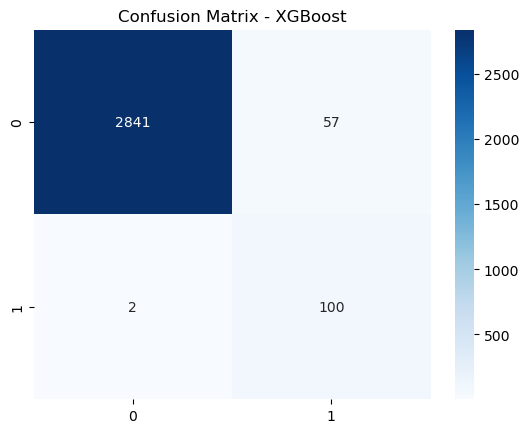

In [29]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model on resampled training data
xgb_clf.fit(X_res, y_res)

# Make predictions on the test set
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluate the model performance
print("XGBoost Performance:\n")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix for XGBoost
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.show()


- Precision and Recall: Precision (1): The precision for the failure class (1) is 0.64, an improvement over the Random Forest model (which had a precision of 0.57 after hyperparameter tuning). This indicates fewer false positives for the failure class.
- Recall (1): The recall for the failure class is 0.98, meaning XGBoost identifies almost all actual failure cases, similar to Random Forest.
- F1-Score (1): The F1-score for the failure class is 0.77, the highest we've seen so far across all models, indicating a good balance between precision and recall for the failure class.
- Overall Accuracy: The overall accuracy remains very high at 98%, but as mentioned earlier, accuracy is less relevant in the context of imbalanced datasets. The focus is on the model's performance with the minority class.
- Macro Avg and Weighted Avg:The macro average F1-score is 0.88, which shows the model handles both classes fairly well. The weighted average F1-score of 0.98 reflects the high performance across both classes, weighted by class support.

**Hyperparameter tuning for the XGBoost model using GridSearchCV**
- n_estimators: The number of trees to grow.
- max_depth: Maximum depth of a tree. Increasing this makes the model more complex.
- learning_rate: Controls the contribution of each tree to the final model. A lower learning rate often needs a higher number of trees.
- subsample: The proportion of the training data to sample for growing trees.
- colsample_bytree: The fraction of features to sample when building each tree.

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the XGBoost model
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, 
                           scoring='f1', cv=3, verbose=2, n_jobs=-1)

# Fit the model on resampled training data
grid_search.fit(X_res, y_res)

# Get the best hyperparameters from GridSearchCV
print("Best parameters found by GridSearchCV:", grid_search.best_params_)

# Evaluate the best model on the test set
best_xgb = grid_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)

# Classification report
print("XGBoost Performance (After Hyperparameter Tuning):\n")
print(classification_report(y_test, y_pred_best_xgb))

# Confusion Matrix
conf_matrix_best_xgb = confusion_matrix(y_test, y_pred_best_xgb)
sns.heatmap(conf_matrix_best_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Best XGBoost Model')
plt.show()

Fitting 3 folds for each of 324 candidates, totalling 972 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:17:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:17:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:17:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:17:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

- Best Hyperparameters:
    - colsample_bytree: 0.8 – This indicates that 80% of the features are randomly sampled when building each tree.
    - learning_rate: 0.2 – A relatively high learning rate, allowing the model to learn faster but with more regularization.
    - max_depth: 5 – A shallower tree depth helps prevent overfitting while maintaining performance.
    - n_estimators: 300 – The model grows 300 trees.
    - subsample: 0.8 – The model samples 80% of the training data for each tree.
- Model Performance:
    - Precision (1): 0.62 for the minority class (failures), which is slightly lower than before tuning but still robust.
    - Recall (1): 0.97 shows that the model continues to identify nearly all actual failure cases.
    - F1-Score (1): 0.76, which is balanced between precision and recall and reflects the model’s good performance on the minority class.
    - Accuracy: The overall accuracy remains at 98%, consistent with previous iterations.

- The XGBoost model is performing well after hyperparameter tuning

In [ ]:
import pickle

# Save the best XGBoost model found by GridSearchCV
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(best_xgb, f)

print("Model saved as 'xgb_model.pkl'")
